In [169]:
import matplotlib.pyplot as plt
from bokeh.palettes import Bright

def calculate_width(tree: dict) -> int:
    """
    Recursively calculate the total width required for a subtree, including the length of labels.

    Parameters
    ----------
    tree : dict
        The subtree for which the width is calculated.

    Returns
    -------
    int
        Total width required.
    """
    return sum(calculate_width(subtree) for subtree in tree.values()) + sum(len(key) for key in tree.keys())

def calculate_figure_size(tree: dict) -> tuple:
    """
    Calculate the figure size based on the tree structure.

    Parameters
    ----------
    tree : dict
        The tree structure.

    Returns
    -------
    tuple
        Figure width and height.
    """
    width = calculate_width(tree) * 0.5
    height = len(tree) * 1.5
    return max(15, width), max(5, height)

def plot_tree(tree: dict, colors : dict, parent_name: str = '', pos: tuple = None, level: int = 0, width: float = 1.):
    """
    Plot a hierarchical tree diagram using matplotlib, oriented from left to right.

    Parameters
    ----------
    tree : dict
        The nested dictionary representing the tree.
    parent_name : str
        The name of the parent node (default is root).
    pos : tuple
        Position of the node (default is left at (0, 0.5)).
    level : int
        Current level in the tree (default is 0, root level).
    width : float
        Vertical space allocated for this subtree (default is 1.0).
    """
    width_per_character = 0.010
    string_separation = 0.1
    level_separation = 0.1       # Reduced separation between levels
    
    if pos is None:
        pos = (0, 0.5)
        
    if parent_name in colors:
        color = colors[parent_name]
    else:
        color = "black"
    
    children = list(tree.keys())
    num_children = len(children)
    if num_children == 0:
        
        if color == "black":
            color = Bright[7][1]
        
        plt.plot([pos[0], pos[0] + string_separation], [pos[1], pos[1]], 'k-')
        plt.text(pos[0] + string_separation, pos[1], " " + parent_name, ha='left', va='center', color = color)
        return

    total_width = calculate_width(tree)
    new_width = width / max(total_width, 1)

    current_y = pos[1] - width / 2
    for child_name, subtree in tree.items():
        child_width = calculate_width({child_name: subtree})
        child_pos = (pos[0] + 0.2 + len(parent_name) * width_per_character, current_y + child_width * new_width / 2)
        plt.plot([pos[0], pos[0] + string_separation], [pos[1], pos[1]], 'k-')
        plt.text(pos[0] + string_separation, pos[1], " " + parent_name, ha='left', va='center', color = color)
        plt.plot([pos[0] + string_separation + len(parent_name) * width_per_character, child_pos[0]], [pos[1], pos[1]], 'k-')
        plt.plot([child_pos[0], child_pos[0]], [pos[1], child_pos[1]], 'k-')
        plot_tree(subtree, colors, child_name, child_pos, level + 1, child_width * new_width)
        current_y += child_width * new_width


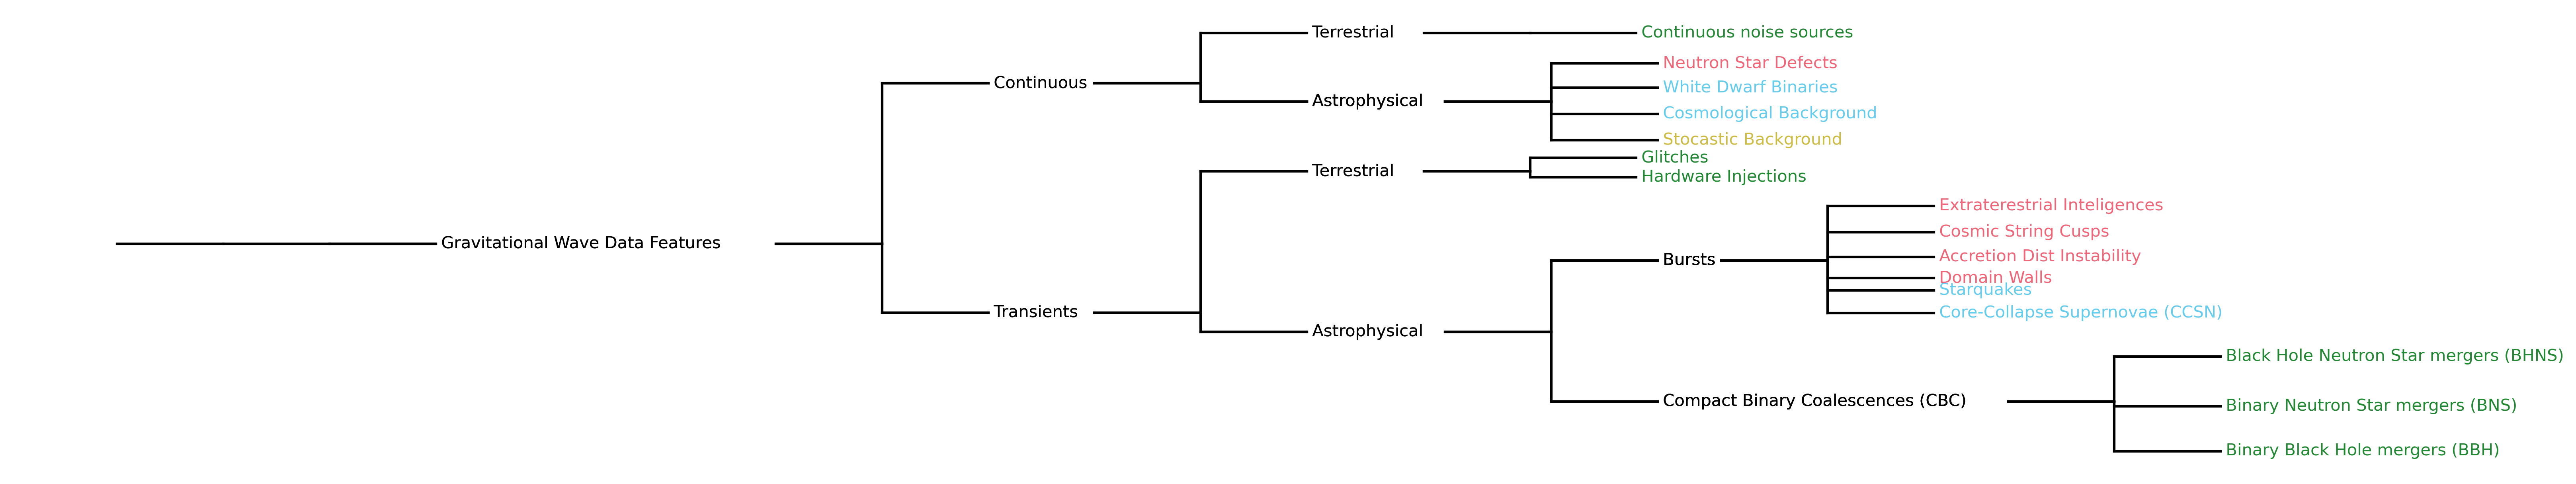

In [173]:
tree = {
    'Gravitational Wave Data Features': 
    {
        'Transients': 
        {
            'Astrophysical': 
            {
                'Compact Binary Coalescences (CBC)':
                {
                    'Binary Black Hole mergers (BBH)' : {},
                    'Binary Neutron Star mergers (BNS)' : {},
                    'Black Hole Neutron Star mergers (BHNS)' : {}
                },
                'Bursts' :
                {
                    'Core-Collapse Supernovae (CCSN)' : {},
                    'Starquakes' : {},
                    'Domain Walls' : {},
                    'Accretion Dist Instability' : {},
                    'Cosmic String Cusps' : {},
                    'Extraterestrial Inteligences' : {}
                }
            },
            'Terrestrial': 
            {
                'Hardware Injections': {},
                'Glitches' : {}
            }
        },
        'Continuous' :
        {
            'Astrophysical' :
            {
                'Stocastic Background' : {},
                'Cosmological Background' : {},
                'White Dwarf Binaries' : {},
                'Neutron Star Defects' : {}
            },
            'Terrestrial' :
            {
                "Continuous noise sources": {}
            }
        }
    }
}

colors = {
    "Binary Black Hole mergers (BBH)" : Bright[7][2],
    'Binary Neutron Star mergers (BNS)' : Bright[7][2],
    'Black Hole Neutron Star mergers (BHNS)' : Bright[7][2],
    'Stocastic Background' : Bright[7][3],
    'Core-Collapse Supernovae (CCSN)' : Bright[7][4],
    'Starquakes' : Bright[7][4],
    'White Dwarf Binaries' : Bright[7][4],
    'Cosmological Background' : Bright[7][4],
    "Glitches" : Bright[7][2],
    "Hardware Injections" : Bright[7][2],
    "Continuous noise sources" :  Bright[7][2]
}
    

figure_width, figure_height = calculate_figure_size(tree)
plt.figure(figsize=(figure_width//10, figure_height), dpi = 300)
plot_tree(tree, colors)
plt.axis('off')
#plt.show()
plt.savefig("data_features.png")